In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
#N_list = [8, 16, 32, 64, 80,100 , 105, 110, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536]

N_list = [8, 16, 32, 64, 100, 128, 200, 256, 300, 400, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536]

#N_list = [8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536]

print(N_list)
epoch_list = [20000]
seed_list = np.arange(1234, 1242)
epochs = epoch_list[0]


df = pd.DataFrame(columns = ['train', 'test', 'metrics', 'times'])
df_summary = pd.DataFrame(columns = ['err', 'texec'])
precision_list = []

for N in N_list:
    precision_list.append(N / 8)
    for seed in seed_list:
        name = 'results/' + 'seed' + str(seed) + '_N'+ str(N) + '_epochs' + str(epochs) + '_size1'
        my_dict = np.load(name + '.npy', allow_pickle = True)

        texec = my_dict.item().get('texec')
        err = my_dict.item().get('err')
        train = my_dict.item().get('train')
        test = my_dict.item().get('test')
        
        diff = np.abs(train - test) / np.abs(test)
        
        metrics = my_dict.item().get('metrics')
        times = my_dict.item().get('times')
        pointsec = my_dict.item().get('pointsec')

        n = times.shape[0]
        min_index = test.argmin()
        train_min = train[min_index]
        test_min = test[min_index]
        diff_min = np.abs(train_min - test_min) 
        
        df1 = pd.DataFrame({
                'N': n * [N],
                'seed': n * [seed],
                'train': train,
                'test': test,
                'metrics': metrics,
                'diff': diff,
                'times': times,
                'iteration' : np.arange(n) * 500,
                'pointsec': pointsec
            })
        
        df2 = pd.DataFrame({
            'N': [N],
            'seed': [seed],
            'err': [err],
            'train': [train[min_index]],
            'test': [test[min_index]],
            'texec': [texec],
            'diff_min': [diff_min]
        })
        
        df = pd.concat([df, df1])
        df_summary = pd.concat([df2, df_summary])
        
        
df = df.reset_index(drop=True)
df_summary = df_summary.reset_index(drop=True)
    
df['N'] = df['N'].astype(int).astype("category")
df['seed'] = df['seed'].astype("category")
df_summary['N'] = df_summary['N'].astype(int).astype("category")
df_summary['seed'] = df_summary['seed'].astype("category")

[8, 16, 32, 64, 100, 128, 200, 256, 300, 400, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536]


In [3]:
pink = np.array([236, 0, 84]) / 255
orange = np.array([254, 64, 18]) / 255
green = np.array([38, 174, 65]) / 255
blue = np.array([44, 95, 177]) / 255
purple = np.array([11,54,156]) / 255
my_palette_train = sns.palettes.color_palette([purple, orange])

colors = [pink, pink, pink, pink,
         blue, blue, blue,blue, blue, green, 
          green, green, green, green, green, green, green, green]#, green, green]
 
my_palette = sns.palettes.color_palette(colors)

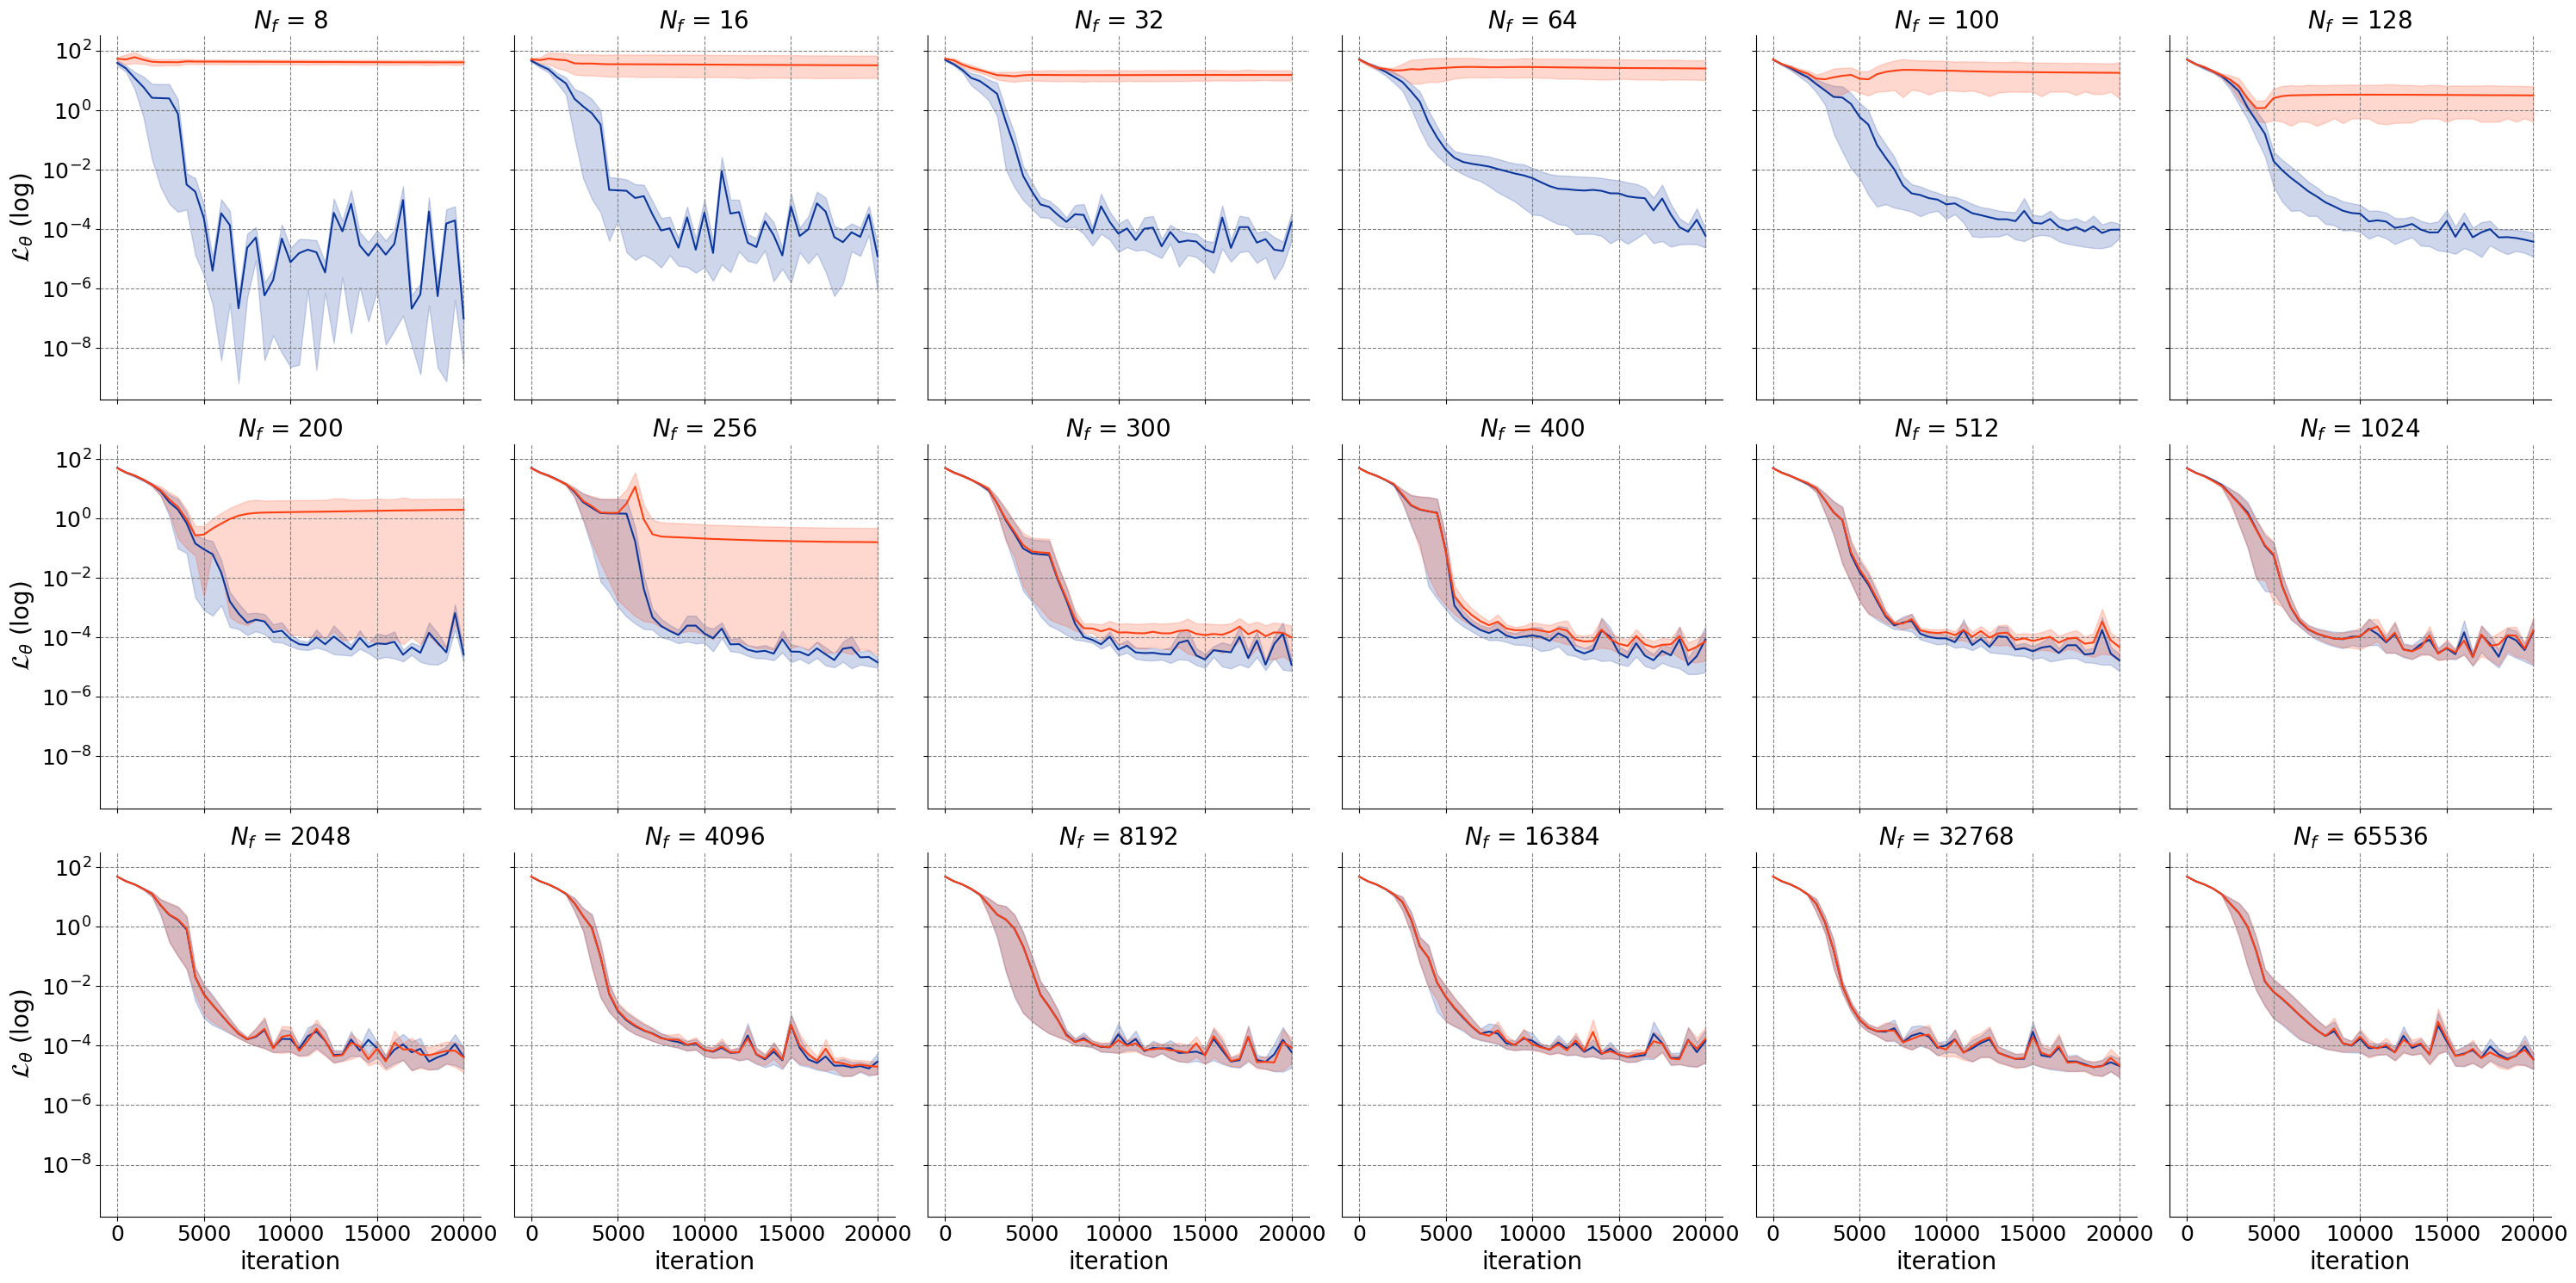

In [4]:
conv = df[["iteration", "N", "train", "test"]]
melt = pd.melt(conv, id_vars=["N", "iteration"], value_vars=["train", "test"])

g = sns.relplot(data=melt, x = 'iteration', y = 'value', hue="variable", kind = 'line', col ='N', legend=False, col_wrap=6,palette = my_palette_train)
g.set(yscale="log")
plt.grid(color='gray', linestyle='dashed')  #just add this

i = 0
for ax in g.axes.flatten():
    ax.grid(color='gray', linestyle='dashed')
    #coll = ax.collections[0]
    #coll.set_color(my_palette_rgb)
    #coll.set_color(my_palette[i])
    #coll.set_color(my_palette[0])
    
    for j in range(2):
        line = ax.get_lines()[j]
        line.set_color(my_palette_train[j])

    ax.set_xlabel('iteration', fontsize=20)
    ax.set_ylabel(r'$\mathcal{L}_\theta$ (log)', fontsize=20)
    title = ax.get_title()
    title = r'$N_f$' + title[1:]
    ax.set_title(title, fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=18)

    i += 1
    
plt.tight_layout()
plt.savefig('plots/lossesLaplace.pdf')    

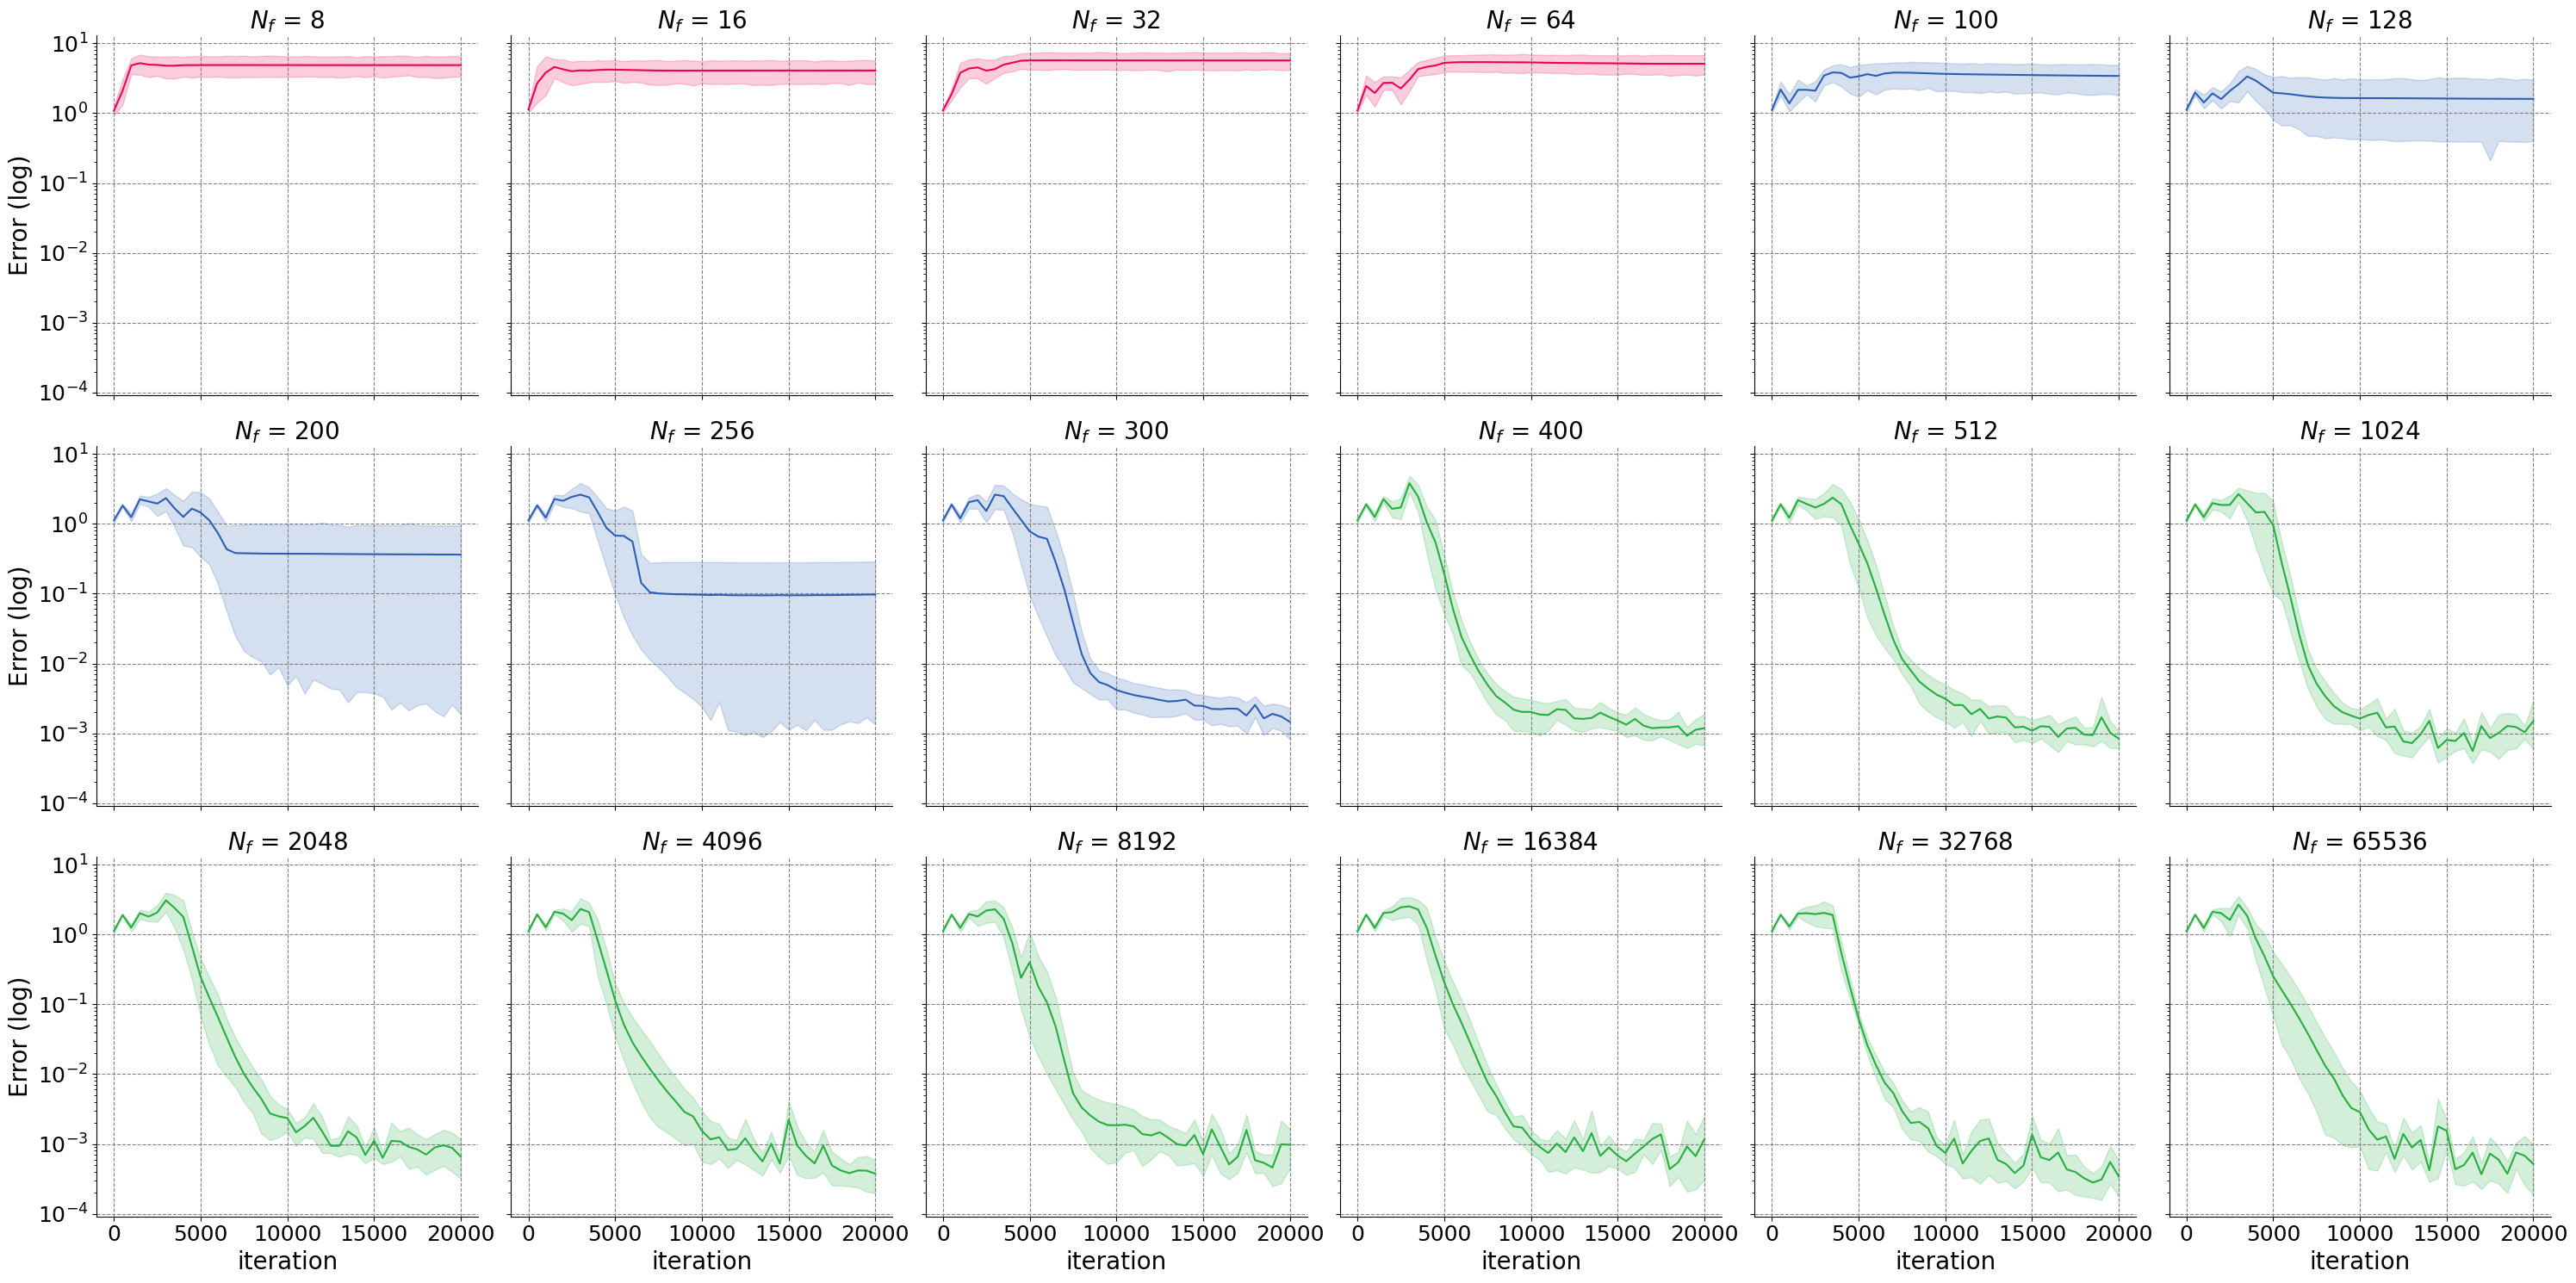

In [5]:
g = sns.relplot(data=df, x = 'iteration', y = 'metrics',kind = 'line', col ='N', legend=False, col_wrap=6)
g.set(yscale="log")

plt.grid(color='gray', linestyle='dashed')  #just add this

i = 0
for ax in g.axes.flatten():
    ax.grid(color='gray', linestyle='dashed')
    coll = ax.collections[0]
    coll.set_color(my_palette[i])
    
    line = ax.get_lines()[0]
    line.set_color(my_palette[i])
    ax.set_xlabel('iteration', fontsize=20)
    ax.set_ylabel('Error (log)', fontsize=20)
    title = ax.get_title()
    title = r'$N_f$' + title[1:]
    ax.set_title(title, fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=18)
    i += 1
    
plt.tight_layout()
plt.savefig('plots/convergenceLaplace.pdf')    

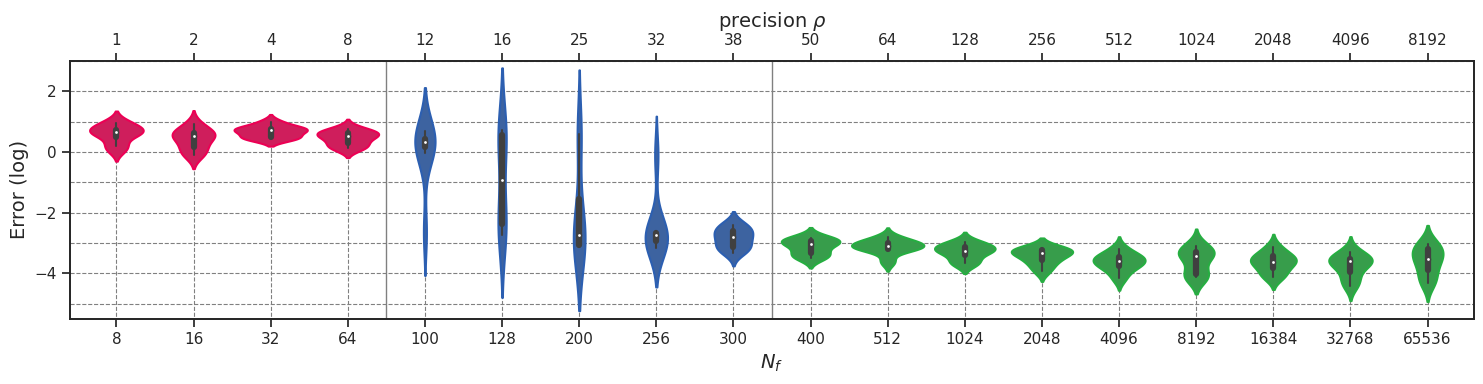

In [6]:
#sns.set_style("whitegrid")
df_summary['err_log'] = np.log10(df_summary['err'])
sns.set(style="ticks")

f, ax = plt.subplots(1,1, figsize=(15,4))
ax.set_axisbelow(True)
# oko con width!
g = sns.violinplot(data=df_summary, x = 'N', y = 'err_log', palette=my_palette, ax=ax, width=-.95)
#ax.grid(color='gray', linestyle='dashed')
#g.set(yscale="log")
#ax.set_facecolor('white') 
ax.set_xlabel(r'$N_f$', fontsize=14)
ax.set_ylabel(r'Error (log)', fontsize=14)

ax.axhline(0, linestyle='--', color='grey',lw=0.8, zorder=-1)
ax.axhline(1, linestyle='--', color='grey',lw=0.8, zorder=-1)
ax.axhline(2, linestyle='--', color='grey',lw=0.8, zorder=-1)
ax.axhline(3, linestyle='--', color='grey',lw=0.8, zorder=-1)
ax.axhline(-1, linestyle='--', color='grey',lw=0.8, zorder=-1)
ax.axhline(-2, linestyle='--', color='grey',lw=0.8, zorder=-1)
ax.axhline(-3, linestyle='--', color='grey',lw=0.8, zorder=-1)
ax.axhline(-4, linestyle='--', color='grey',lw=0.8, zorder=-1)
ax.axhline(-5, linestyle='--', color='grey',lw=0.8, zorder=-1)



ax.axvline(3.5, linestyle='-', color='grey',lw=1, zorder=-1)
ax.axvline(8.5, linestyle='-', color='grey',lw=1, zorder=-1)

#plt.grid(axis='x')

# vertical plots
plt.plot([0,0], [-6,1],color='grey',linestyle='--', lw=0.8,zorder=-1)
plt.plot([1,1], [-6,1],color='grey',linestyle='--', lw=0.8,zorder=-1)
plt.plot([2,2], [-6,1],color='grey',linestyle='--', lw=0.8,zorder=-1)
plt.plot([3,3], [-6,1],color='grey',linestyle='--', lw=0.8,zorder=-1)


for i in range(4, len(N_list)):
    plt.plot([i,i], [-6,-3],color='grey',linestyle='--', lw=0.8,zorder=-1)
    
plt.ylim(-5.5, 3)
plt.xlim(-.6,17.6)
ax2 = ax.twiny()

new_tick_locations = np.arange(np.array(N_list).shape[0])
precision_list = np.array(precision_list)

def tick_function(X):    
    return ["%.0f" % z for z in X]

ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(new_tick_locations)
ax2.set_xticklabels(tick_function(precision_list))
ax2.set_xlabel(r"precision $\rho$", fontsize=14)



#Nviolin = 18
Nviolin = len(N_list)
for i in range(Nviolin):
    g.collections[2 * i].set_edgecolor(my_palette[i])
    
plt.tight_layout()
plt.savefig('plots/transientLaplacelr4.pdf')

In [17]:
pd.pivot_table(data = df_summary, values = ["err"], index = "N")

,err
N,
8,4.685158
16,3.332287
32,5.051381
64,3.243037
100,2.149247
128,1.751967
200,0.908988
256,0.097302
300,0.001846


In [ ]:
pd.pivot_table(data = df_summary, values = ["err"], index = "N")

In [7]:
pd.pivot_table(data = df[df.iteration >= 15000], values = ["diff"], index="N")

,diff
N,
8,0.999996
16,0.999987
32,0.999994
64,0.999972
100,0.996965
128,0.923339
200,0.657679
256,0.591491
300,0.637573


<AxesSubplot: xlabel='N'>

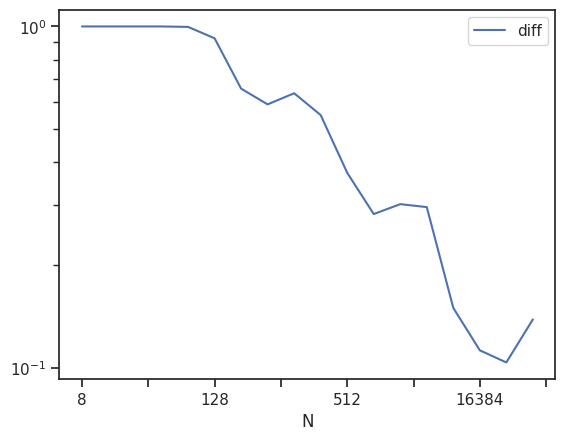

In [8]:
pd.pivot_table(data = df[df.iteration >= 15000], values = ["diff"], index="N").plot(logy=True)

In [9]:
pd.pivot_table(data = df_summary, values = ["diff_min"], index="N")

,diff_min
N,
8,2.873553e+01
16,1.418182e+01
32,1.094523e+01
64,4.541496e+00
100,1.437494e+00
128,4.191481e-01
200,9.140347e-02
256,1.602303e-01
300,6.030436e-05


In [10]:
conv_summary = df_summary[["N", "train", "test", "err"]]
melt_summary = pd.melt(conv_summary, id_vars=["N"], value_vars=["train", "test", "err"])

[None]

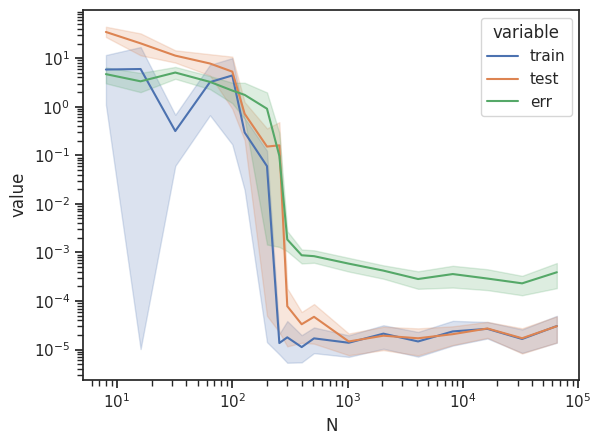

In [11]:
conv_summary = df_summary[["N", "train", "test", "err"]]
melt_summary = pd.melt(conv_summary, id_vars=["N"], value_vars=["train", "test", "err"])
g = sns.lineplot(data=melt_summary, x="N", y="value", hue="variable")
g.set(xscale="log")
g.set(yscale="log")

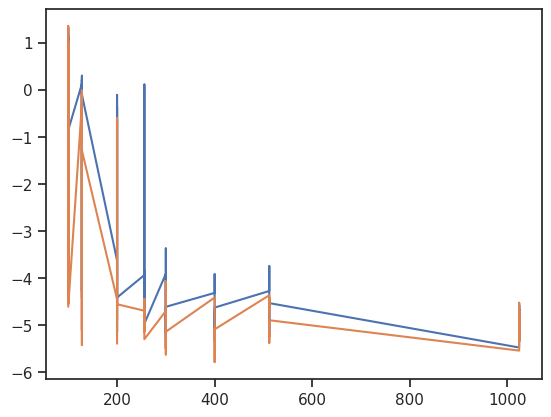

In [12]:
melt_summary["N"] = melt_summary["N"].astype(int)
dg = melt_summary.loc[(melt_summary['N'] >= 100) & (melt_summary['N'] <= 1024)]

dg_train = dg[dg["variable"] == "train"]
dg_test = dg[dg["variable"] == "test"]

x, y = dg_test.N, dg_test.value
x1, y1 = dg_train.N, dg_train.value
logx = np.log10(x)
logy = np.log10(y)

logx1 = np.log10(x1)
logy1 = np.log10(y1)

plt.plot(x, logy)
plt.plot(x1, logy1)


/tmp/ipykernel_543/7577013.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = np.array(data.index.values, dtype=np.float)


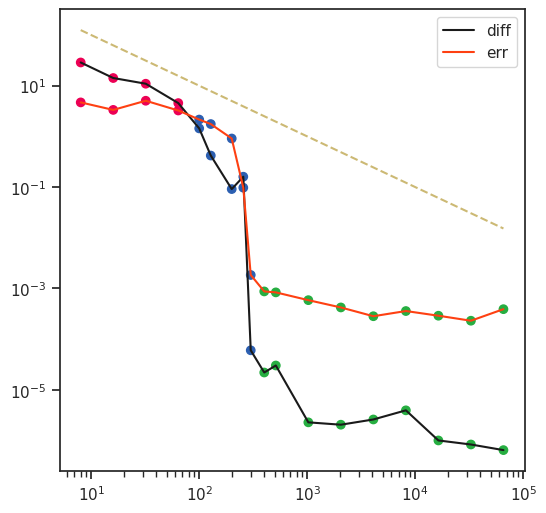

In [25]:
data = pd.pivot_table(data = df_summary, values = ["err", "diff_min"], index="N")

x = np.array(data.index.values, dtype=np.float)
y1 = data.diff_min.values
y2 = data.err.values

fig, ax = plt.subplots(1,1, figsize = (6,6))


ax.plot(x,y1, color = "k", label = "diff")
ax.scatter(x,y1, marker="o", color=my_palette)
ax.plot(x, 1000 * x**-1, "--y")


ax.plot(x,y2, color = orange, label = "err")
ax.scatter(x,y2, marker="o", color=my_palette)

ax.set_xscale('log')
ax.set_yscale('log')

#ax2.loglog(x, 1000 * x**-1)

#for i in range(x.shape[0]):
#    ax1.text(np.log10(x[i]), -1, x.astype(str)[i])
ax.legend()

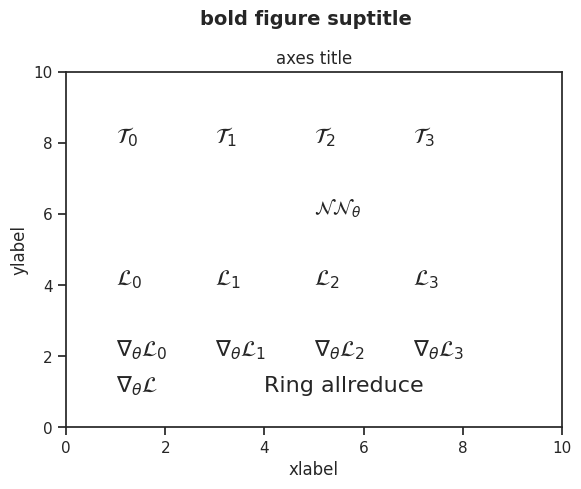

In [13]:
fig = plt.figure()
ax = fig.add_subplot()
fig.subplots_adjust(top=0.85)

fsize = 16

# Set titles for the figure and the subplot respectively
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')
ax.set_title('axes title')

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

# Set both x- and y-axis limits to [0, 10] instead of default [0, 1]
ax.axis([0, 10, 0, 10])

ax.text(1,8,r'$\mathcal{T}_0$', fontsize=fsize)
ax.text(3,8,r'$\mathcal{T}_1$', fontsize=fsize)
ax.text(5,8,r'$\mathcal{T}_2$', fontsize=fsize)
ax.text(7,8,r'$\mathcal{T}_3$', fontsize=fsize)

ax.text(5,6,r'$\mathcal{N}\mathcal{N}_\theta$', fontsize=14)

ax.text(1,4,r'$\mathcal{L}_0$', fontsize=fsize)
ax.text(3,4,r'$\mathcal{L}_1$', fontsize=fsize)
ax.text(5,4,r'$\mathcal{L}_2$', fontsize=fsize)
ax.text(7,4,r'$\mathcal{L}_3$', fontsize=fsize)

ax.text(1,2,r'$\nabla_\theta\mathcal{L}_0$', fontsize=fsize)
ax.text(3,2,r'$\nabla_\theta\mathcal{L}_1$', fontsize=fsize)
ax.text(5,2,r'$\nabla_\theta\mathcal{L}_2$', fontsize=fsize)
ax.text(7,2,r'$\nabla_\theta\mathcal{L}_3$', fontsize=fsize)


ax.text(1,1,r'$\nabla_\theta\mathcal{L}$', fontsize=fsize)

ax.text(4,1,r'Ring allreduce', fontsize=fsize)
#plt.show()

plt.savefig('plots/export-symbols.svg')


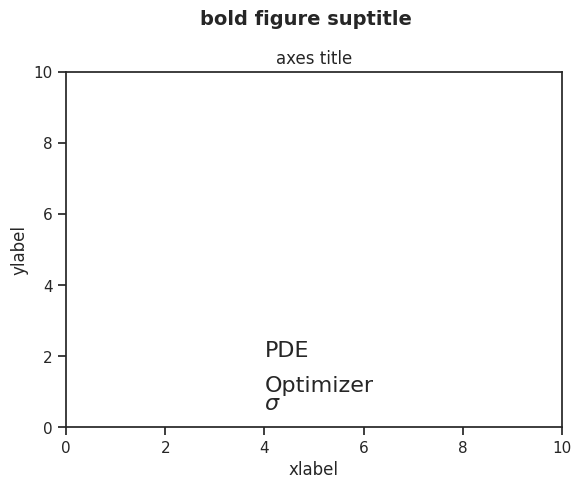

In [14]:
fig = plt.figure()
ax = fig.add_subplot()
fig.subplots_adjust(top=0.85)

fsize = 16

# Set titles for the figure and the subplot respectively
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')
ax.set_title('axes title')

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

# Set both x- and y-axis limits to [0, 10] instead of default [0, 1]
ax.axis([0, 10, 0, 10])

ax.text(4,1,r'Optimizer', fontsize=fsize)
ax.text(4,2,r'PDE', fontsize=fsize)
ax.text(4,0.5,r'$\sigma$', fontsize=fsize)


plt.savefig('plots/export-symbols.svg')